# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk(r'.\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\data\sample_submission.csv
.\data\test.csv
.\data\train.csv


# Import data

In [3]:
sample_submission = pd.read_csv(r".\data\sample_submission.csv")
test = pd.read_csv(r".\data\test.csv")
train = pd.read_csv(r".\data\train.csv")

# Compare train with test

In [4]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


* Transported col is not given in test set as it should be preticted by model and returned in submission file, like this:

In [6]:
sample_submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Evaluate training data

## 1. Check for missing values

In [7]:
train[train.isnull().all(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


as you can see there is no row full of null

In [8]:
def analize_data(df, data_name="data"):
  print("Analysis of: "+data_name)
  print("Number of objects: ", df.shape[0])
  print("Number of attributes: ", df.shape[1])
  print("Number of objects with at least 1 missing value: %d" % df.isnull().any(axis=1).sum())
  print("Number of missing values in attributes:")
  missing_val_count_by_column = (df.isnull().sum())
  missing_val= (missing_val_count_by_column[missing_val_count_by_column > 0])
  for column, count in missing_val.items():
    print("  %s: %d  (%.2f%%)" % (column, count, count/df.shape[0]*100))
  print()

In [9]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8693
Number of attributes:  14
Number of objects with at least 1 missing value: 2087
Number of missing values in attributes:
  HomePlanet: 201  (2.31%)
  CryoSleep: 217  (2.50%)
  Cabin: 199  (2.29%)
  Destination: 182  (2.09%)
  Age: 179  (2.06%)
  VIP: 203  (2.34%)
  RoomService: 181  (2.08%)
  FoodCourt: 183  (2.11%)
  ShoppingMall: 208  (2.39%)
  Spa: 183  (2.11%)
  VRDeck: 188  (2.16%)
  Name: 200  (2.30%)



## 2. Change datatype if needed

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
print(train['VIP'].unique())
print(train['CryoSleep'].unique())

[False True nan]
[False True nan]


In [12]:
train['VIP'] = train['VIP'].astype('bool')
train['CryoSleep'] = train['CryoSleep'].astype('bool')

Then we need to split *Cabin* attribute into 3 seperate attributes: *deck*, *num* and *side* as it is mentioned in dataset describtion.

In [13]:
train.dropna(subset=['Cabin'], inplace=True)
tmp = train['Cabin'].str.split('/', expand=True)
tmp.columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side']
tmp_indx = train.columns.get_loc('Cabin')
for i, column in enumerate(tmp.columns):
    train.insert(tmp_indx+1+i, column, tmp[column])
train['Cabin_number']=train['Cabin_number'].astype('int')
train.drop('Cabin', axis=1, inplace=True)
train.replace({'P': "Port", 'S': "Starboard"}, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3. Exploratory data analysis

### 1. Split to numerical and categorical data

In [14]:
for col in train:
    print(f"{col} - {train[col].nunique()}")

PassengerId - 8494
HomePlanet - 3
CryoSleep - 2
Cabin_deck - 8
Cabin_number - 1817
Cabin_side - 2
Destination - 3
Age - 80
VIP - 2
RoomService - 1256
FoodCourt - 1479
ShoppingMall - 1105
Spa - 1307
VRDeck - 1291
Name - 8277
Transported - 2


I put the columns that has not so much categories to train_cat

In [15]:
train_num = train[['Cabin_number', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_cat = train[['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']]

I abandoned id and name because these data is useless.

### 2. Draw chart for categorical and numerical data

### Categorical data charts

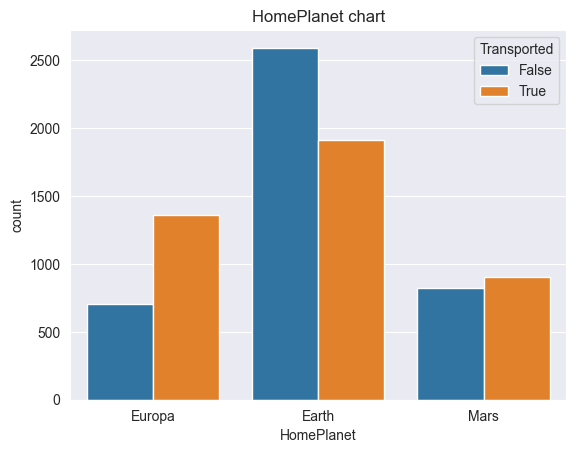

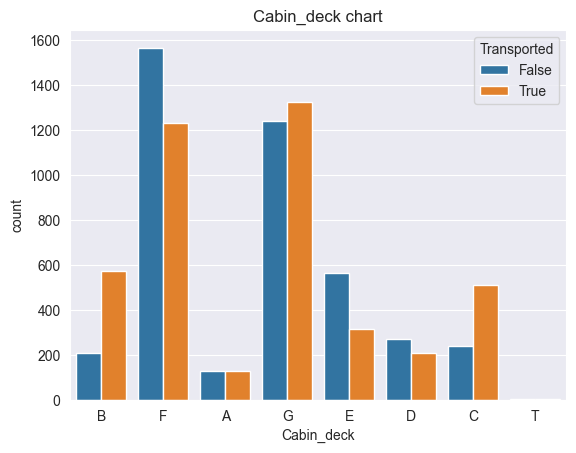

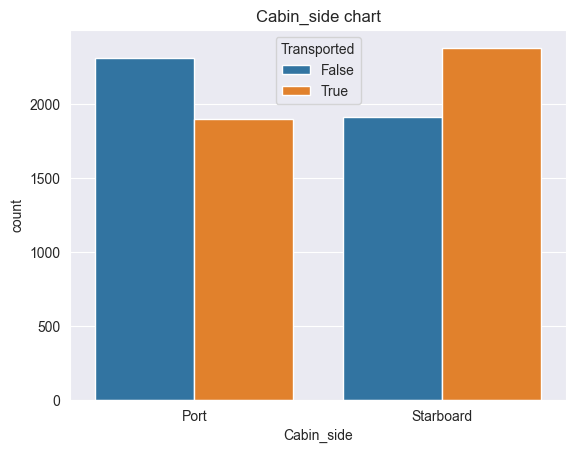

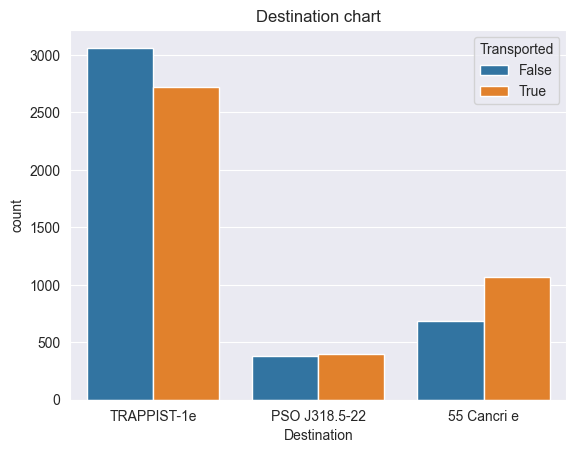

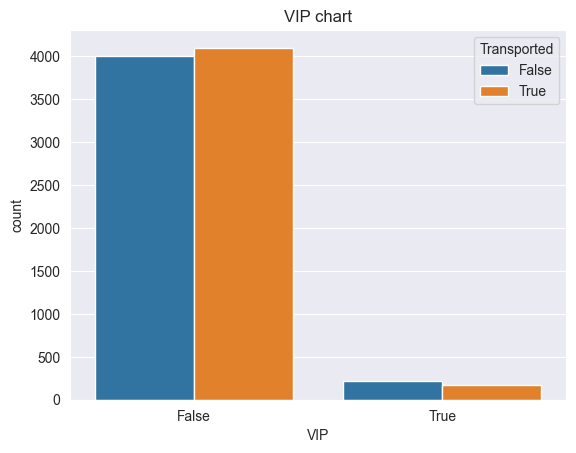

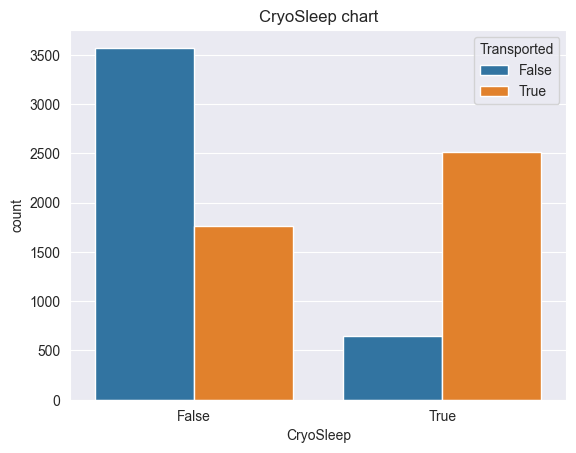

In [16]:
for column in train_cat:
    sns.countplot(
        data=train,
        x=column,
        hue="Transported"
    )
    plt.title(column+" chart")
    plt.show()

### 3. Numerical data charts

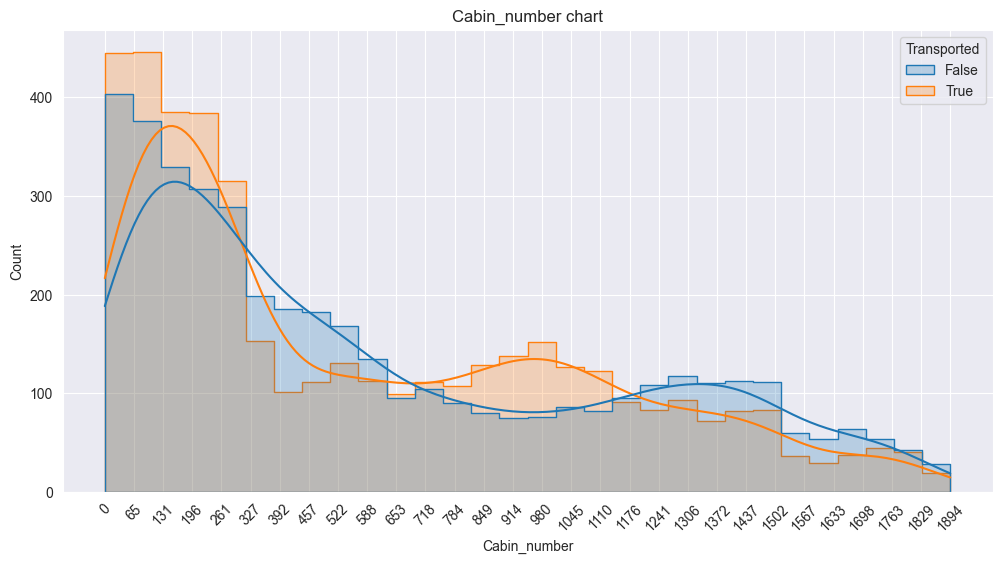

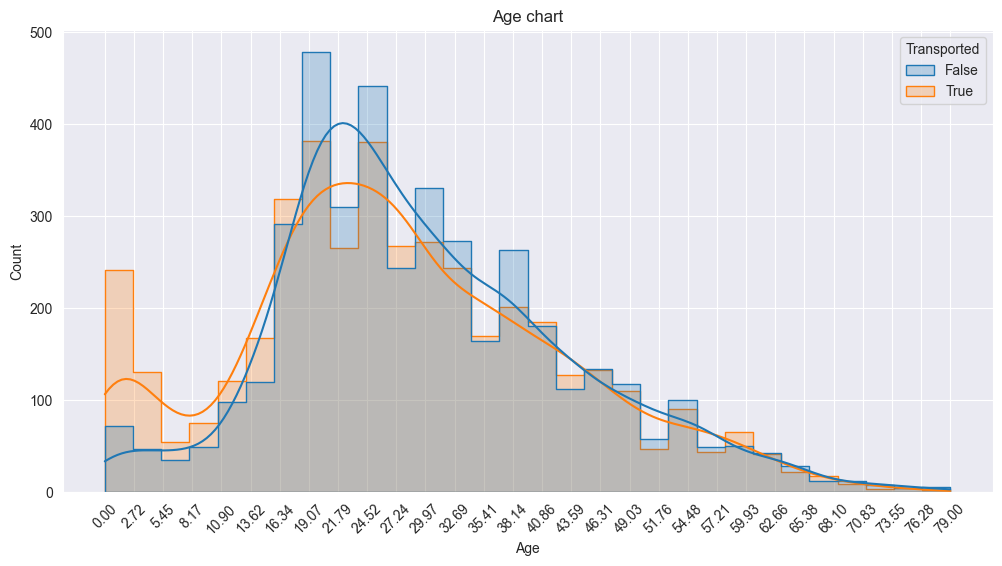

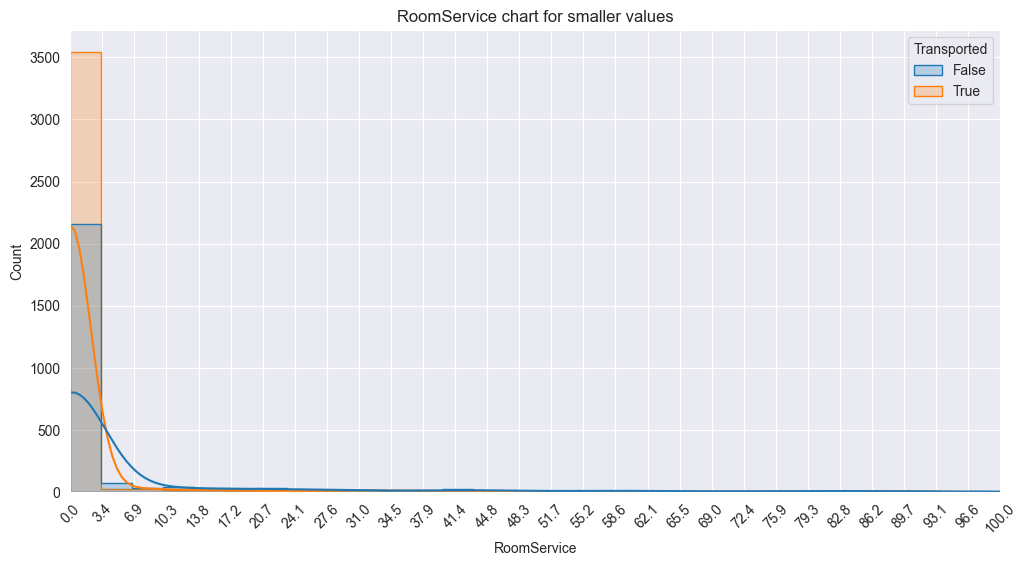

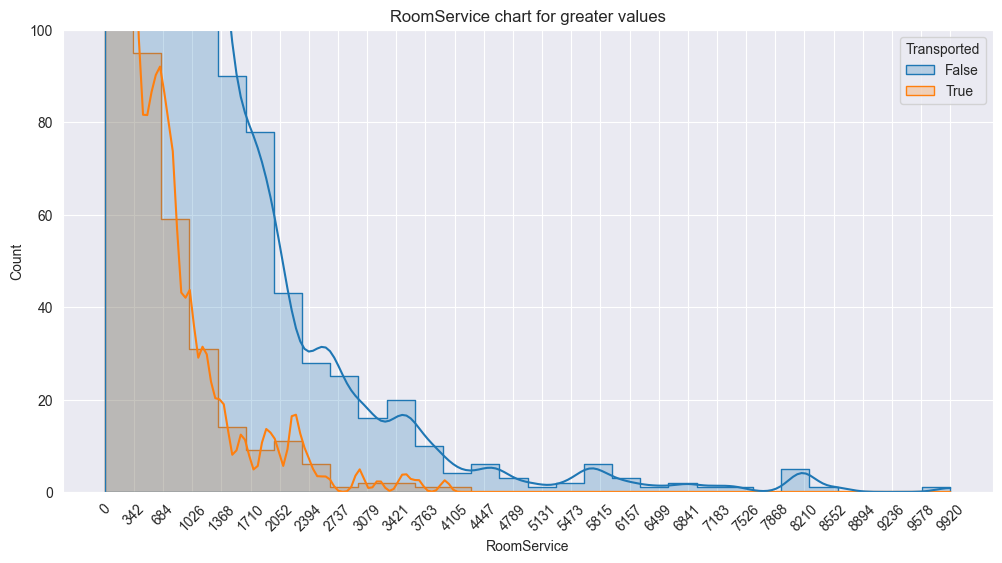

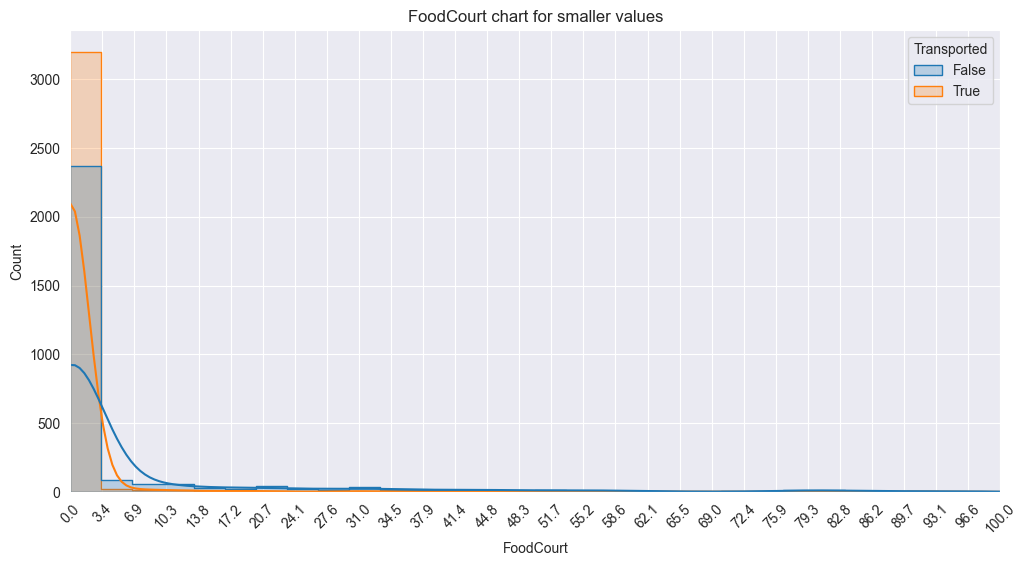

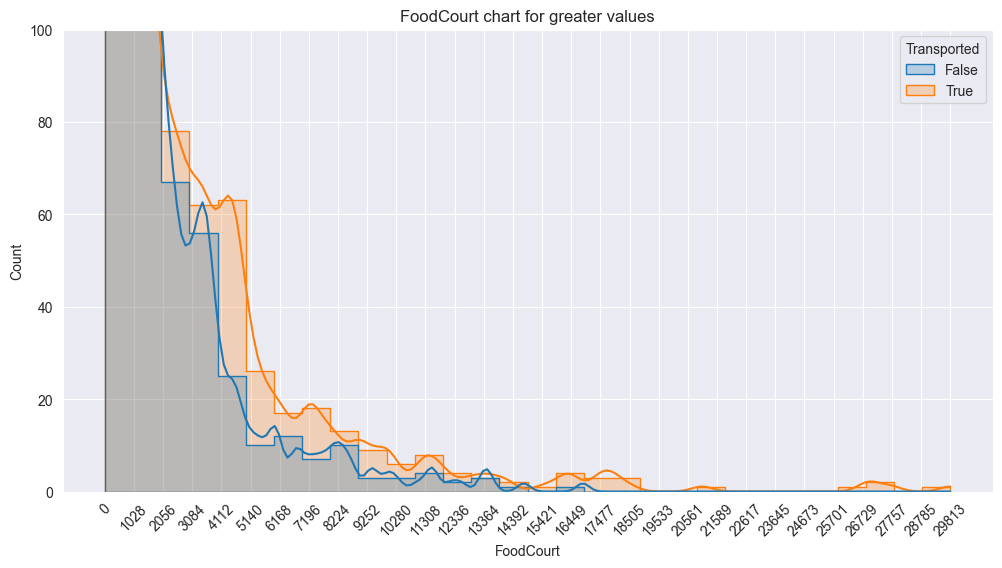

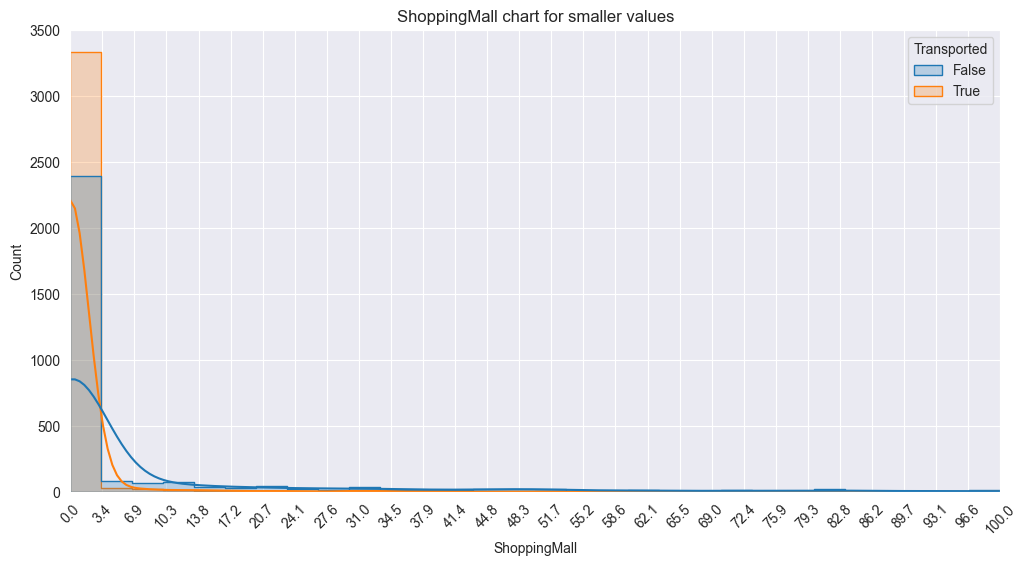

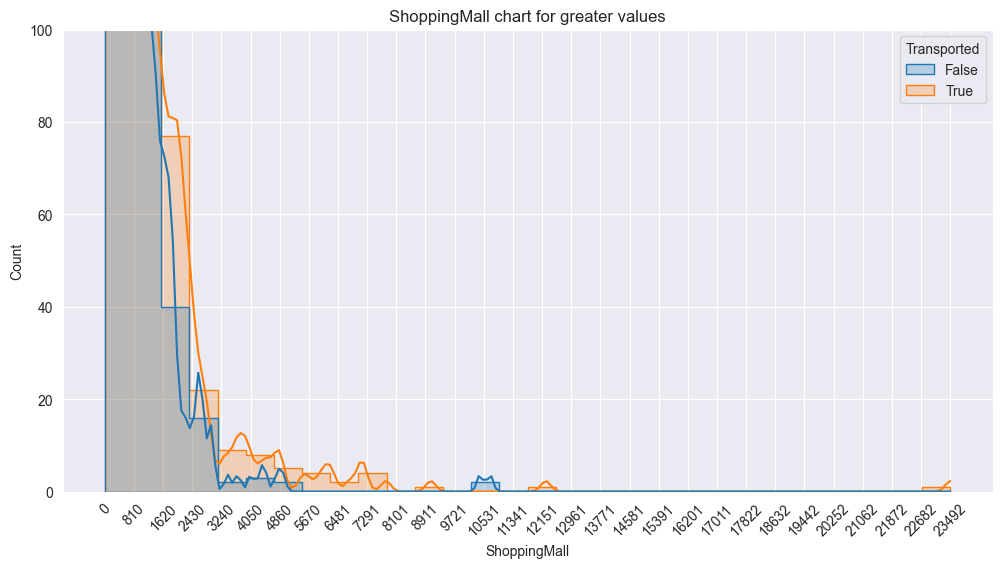

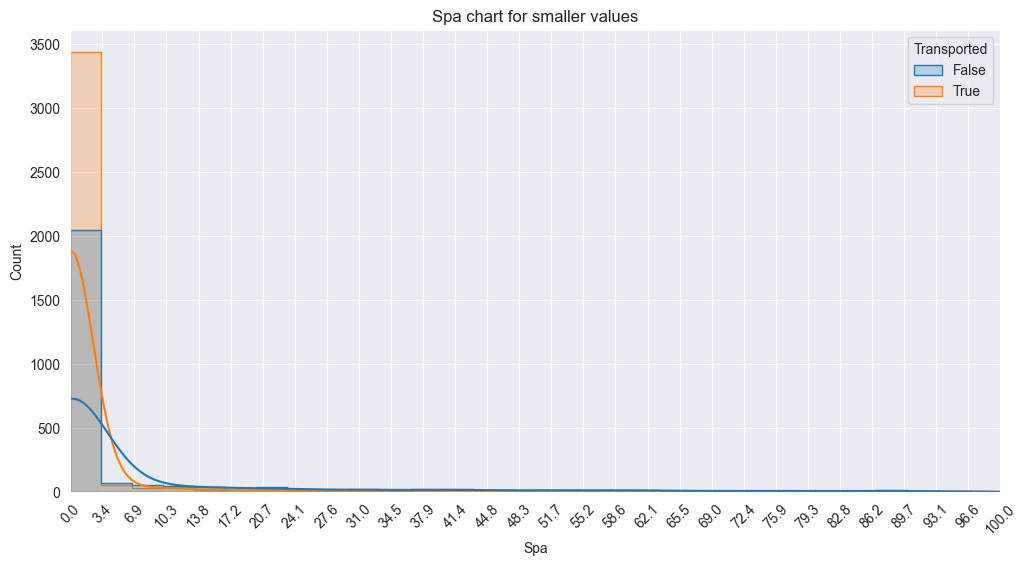

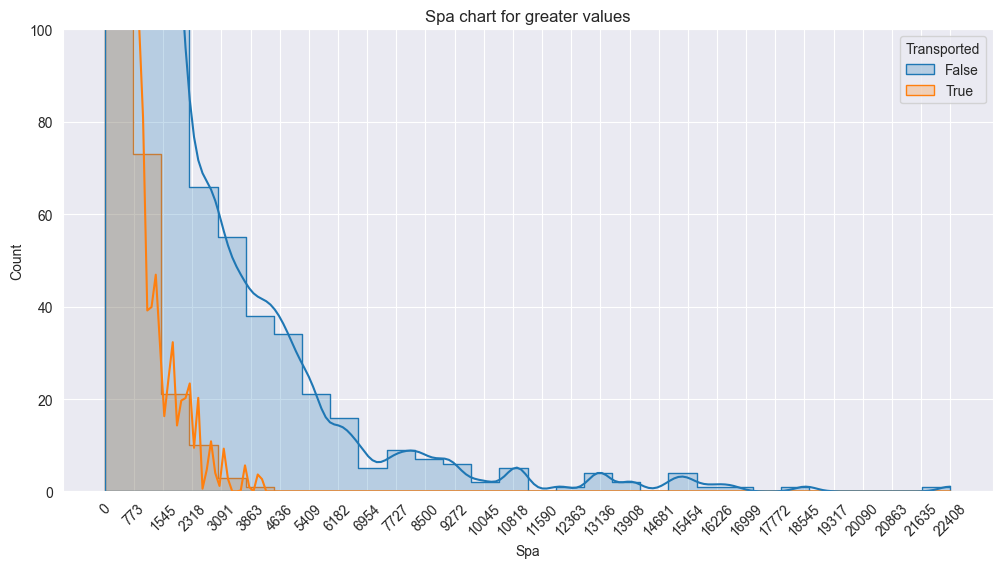

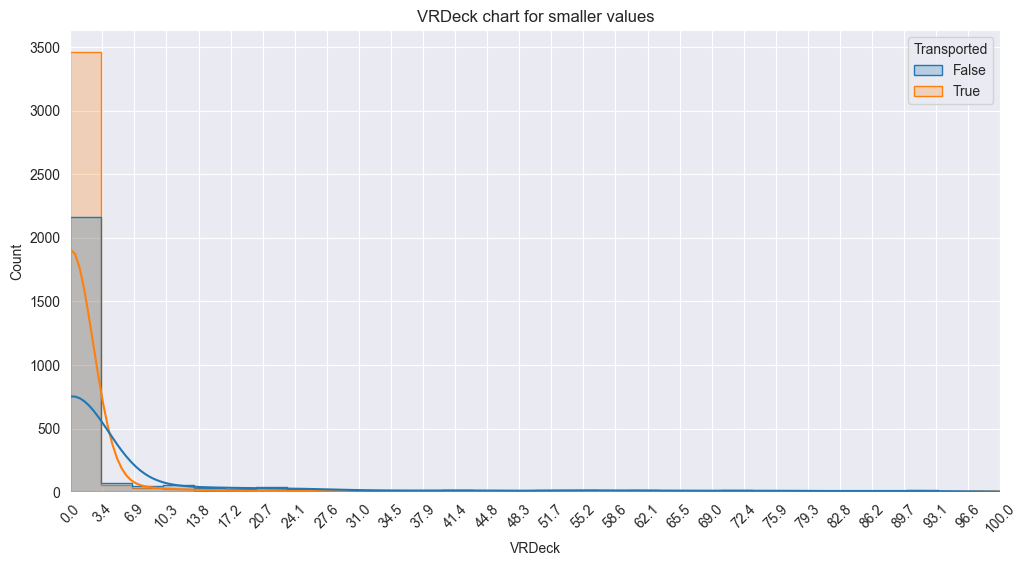

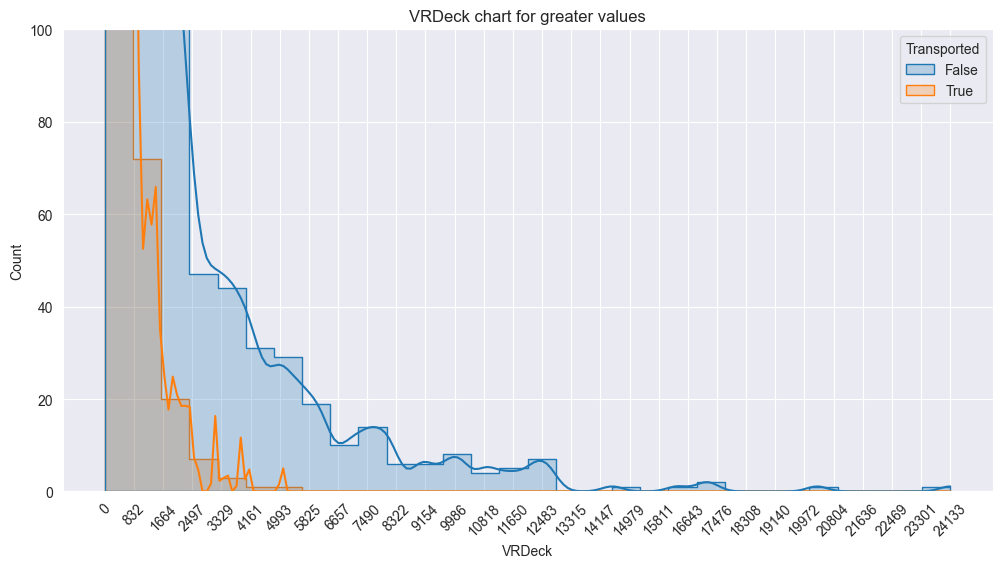

In [17]:
def draw_plot_with_limits(column, limit_x=None, limit_y=None, title="chart"):
    plt.figure(figsize=(12, 6))
    if limit_x:
        data_to_plot = train[train[column] <= limit_x]
    else:
        data_to_plot = train
    number_of_unique = data_to_plot[column].nunique()
    freq_of_most_freq_value = data_to_plot[column].value_counts()[0]
    if number_of_unique > 30:
        ticks = np.linspace(data_to_plot[column].min(), data_to_plot[column].max(), 30)
    else:
        ticks = sorted(data_to_plot[column].unique())
    
    sns.histplot(
        data=data_to_plot,
        x=column,
        hue="Transported",
        kde=True,
        bins=30,
        element="step",
    ).set_xticks(ticks)
    plt.title(f'{column} {title}')
    plt.xticks(rotation=45)
    if limit_y:
        plt.ylim(0, limit_y)
    if limit_x:
        plt.xlim(0, limit_x)
    plt.show()

for column in train_num:
    freq_of_most_freq_value = train[column].value_counts()[0]
    if freq_of_most_freq_value > 1000:
        draw_plot_with_limits(column, limit_x=100, title="chart for smaller values")
        draw_plot_with_limits(column, limit_y=100, title="chart for greater values")
    else:
        draw_plot_with_limits(column)

Let's count expenses of each passenger

In [18]:
spent_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['Expenses'] = train[spent_columns].sum(axis=1)

Check corelations between expenses and categorical columns

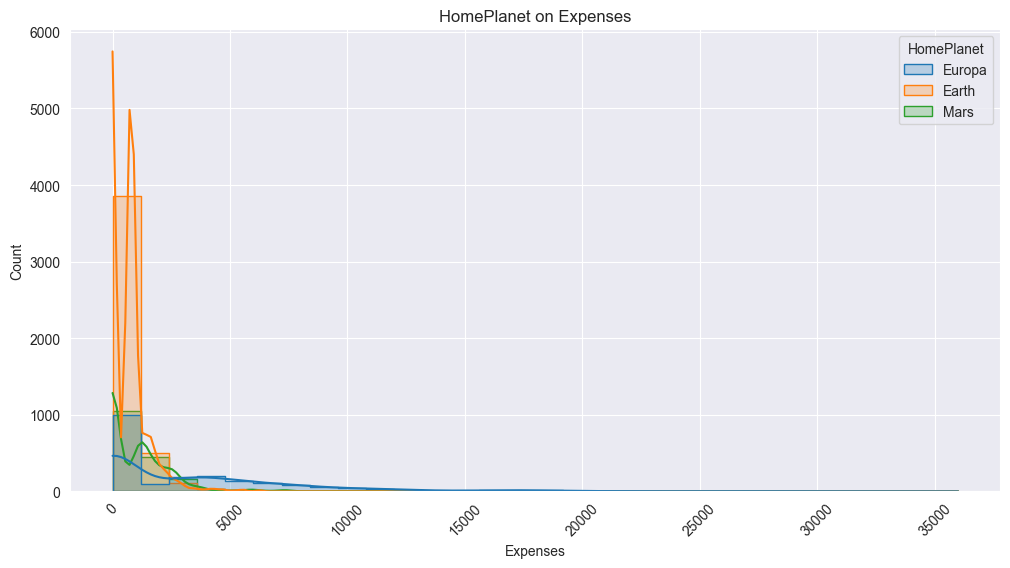

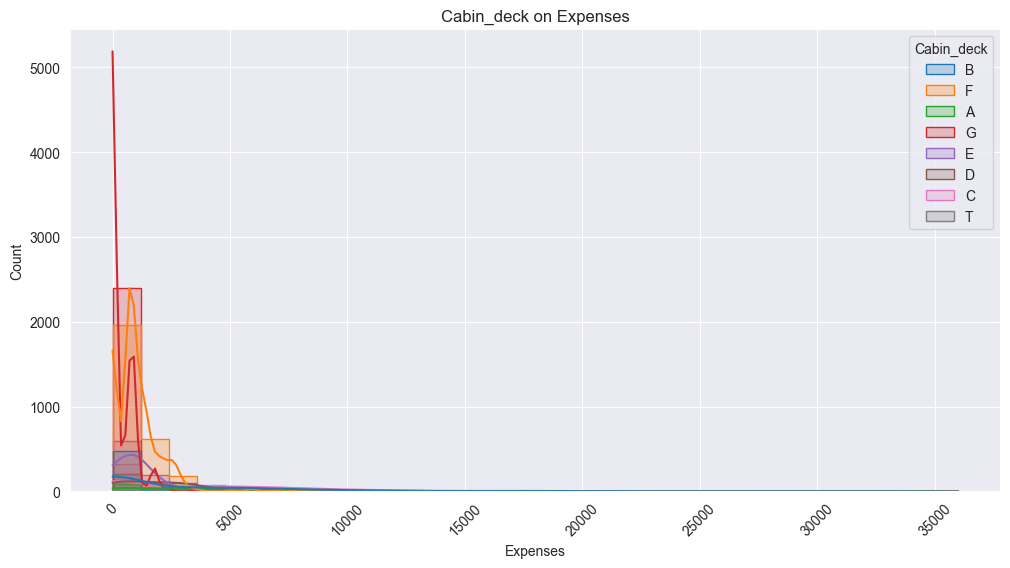

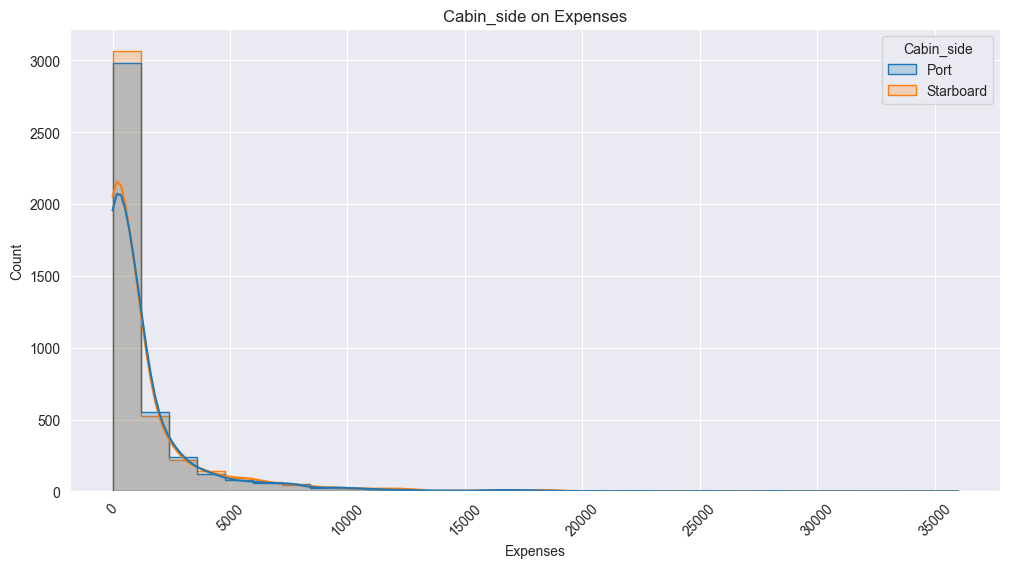

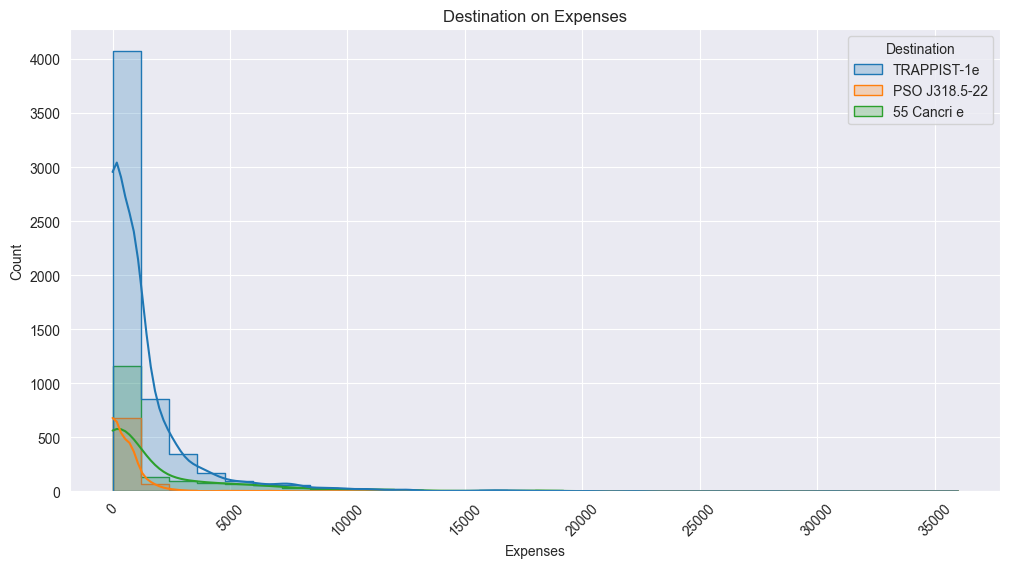

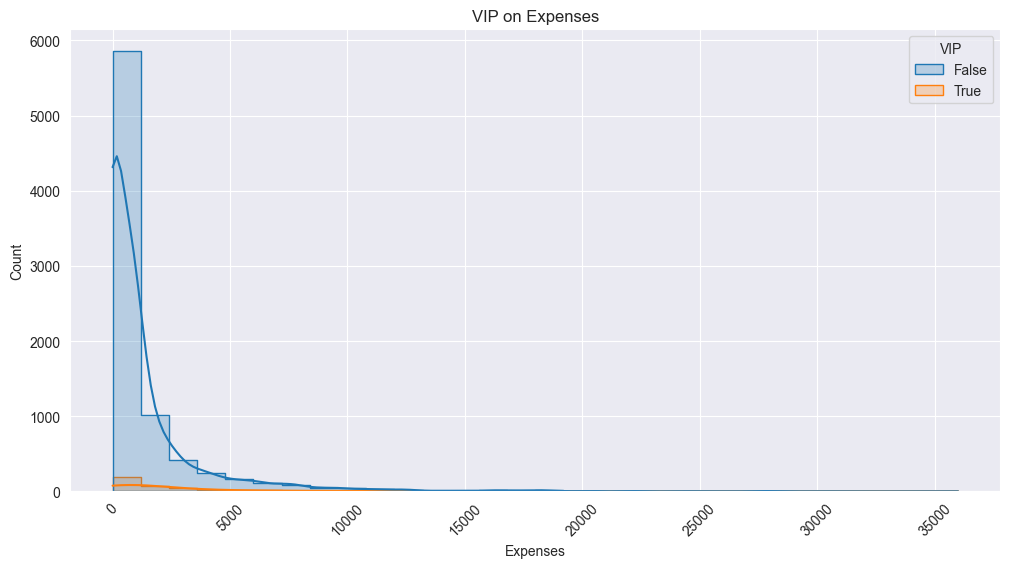

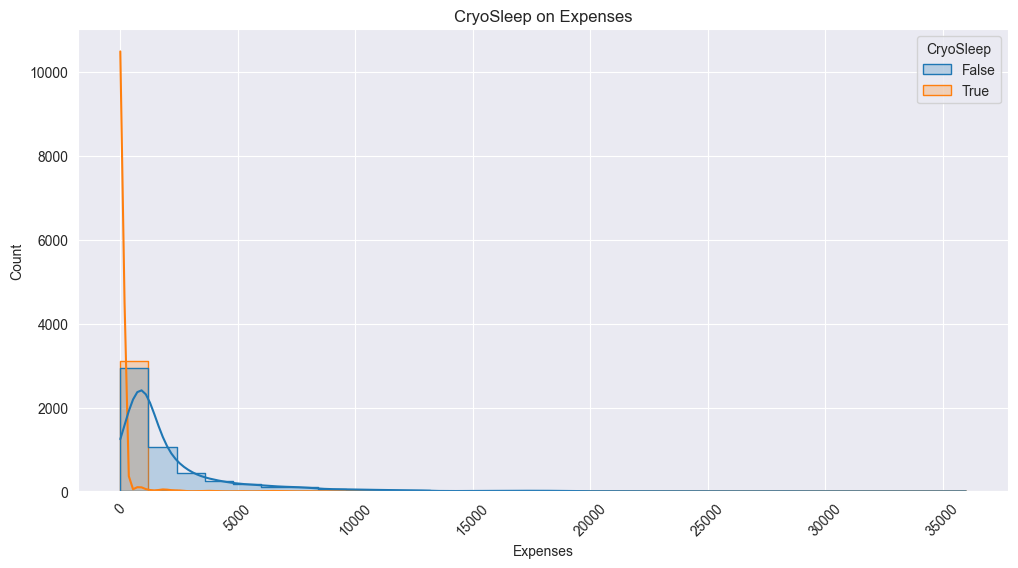

In [19]:
columns_to_check = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']

for column in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=train,
        x="Expenses",
        hue=column,
        kde=True,
        bins=30,
        element="step",
    )
    plt.title(f'{column} on Expenses')
    plt.xticks(rotation=45)
    plt.show()

There is not big impact of categorical data on expenses, except cryosleep, where we can see that people put into cryosleep had significantly less expenses.

#### Boxplot of numerical values

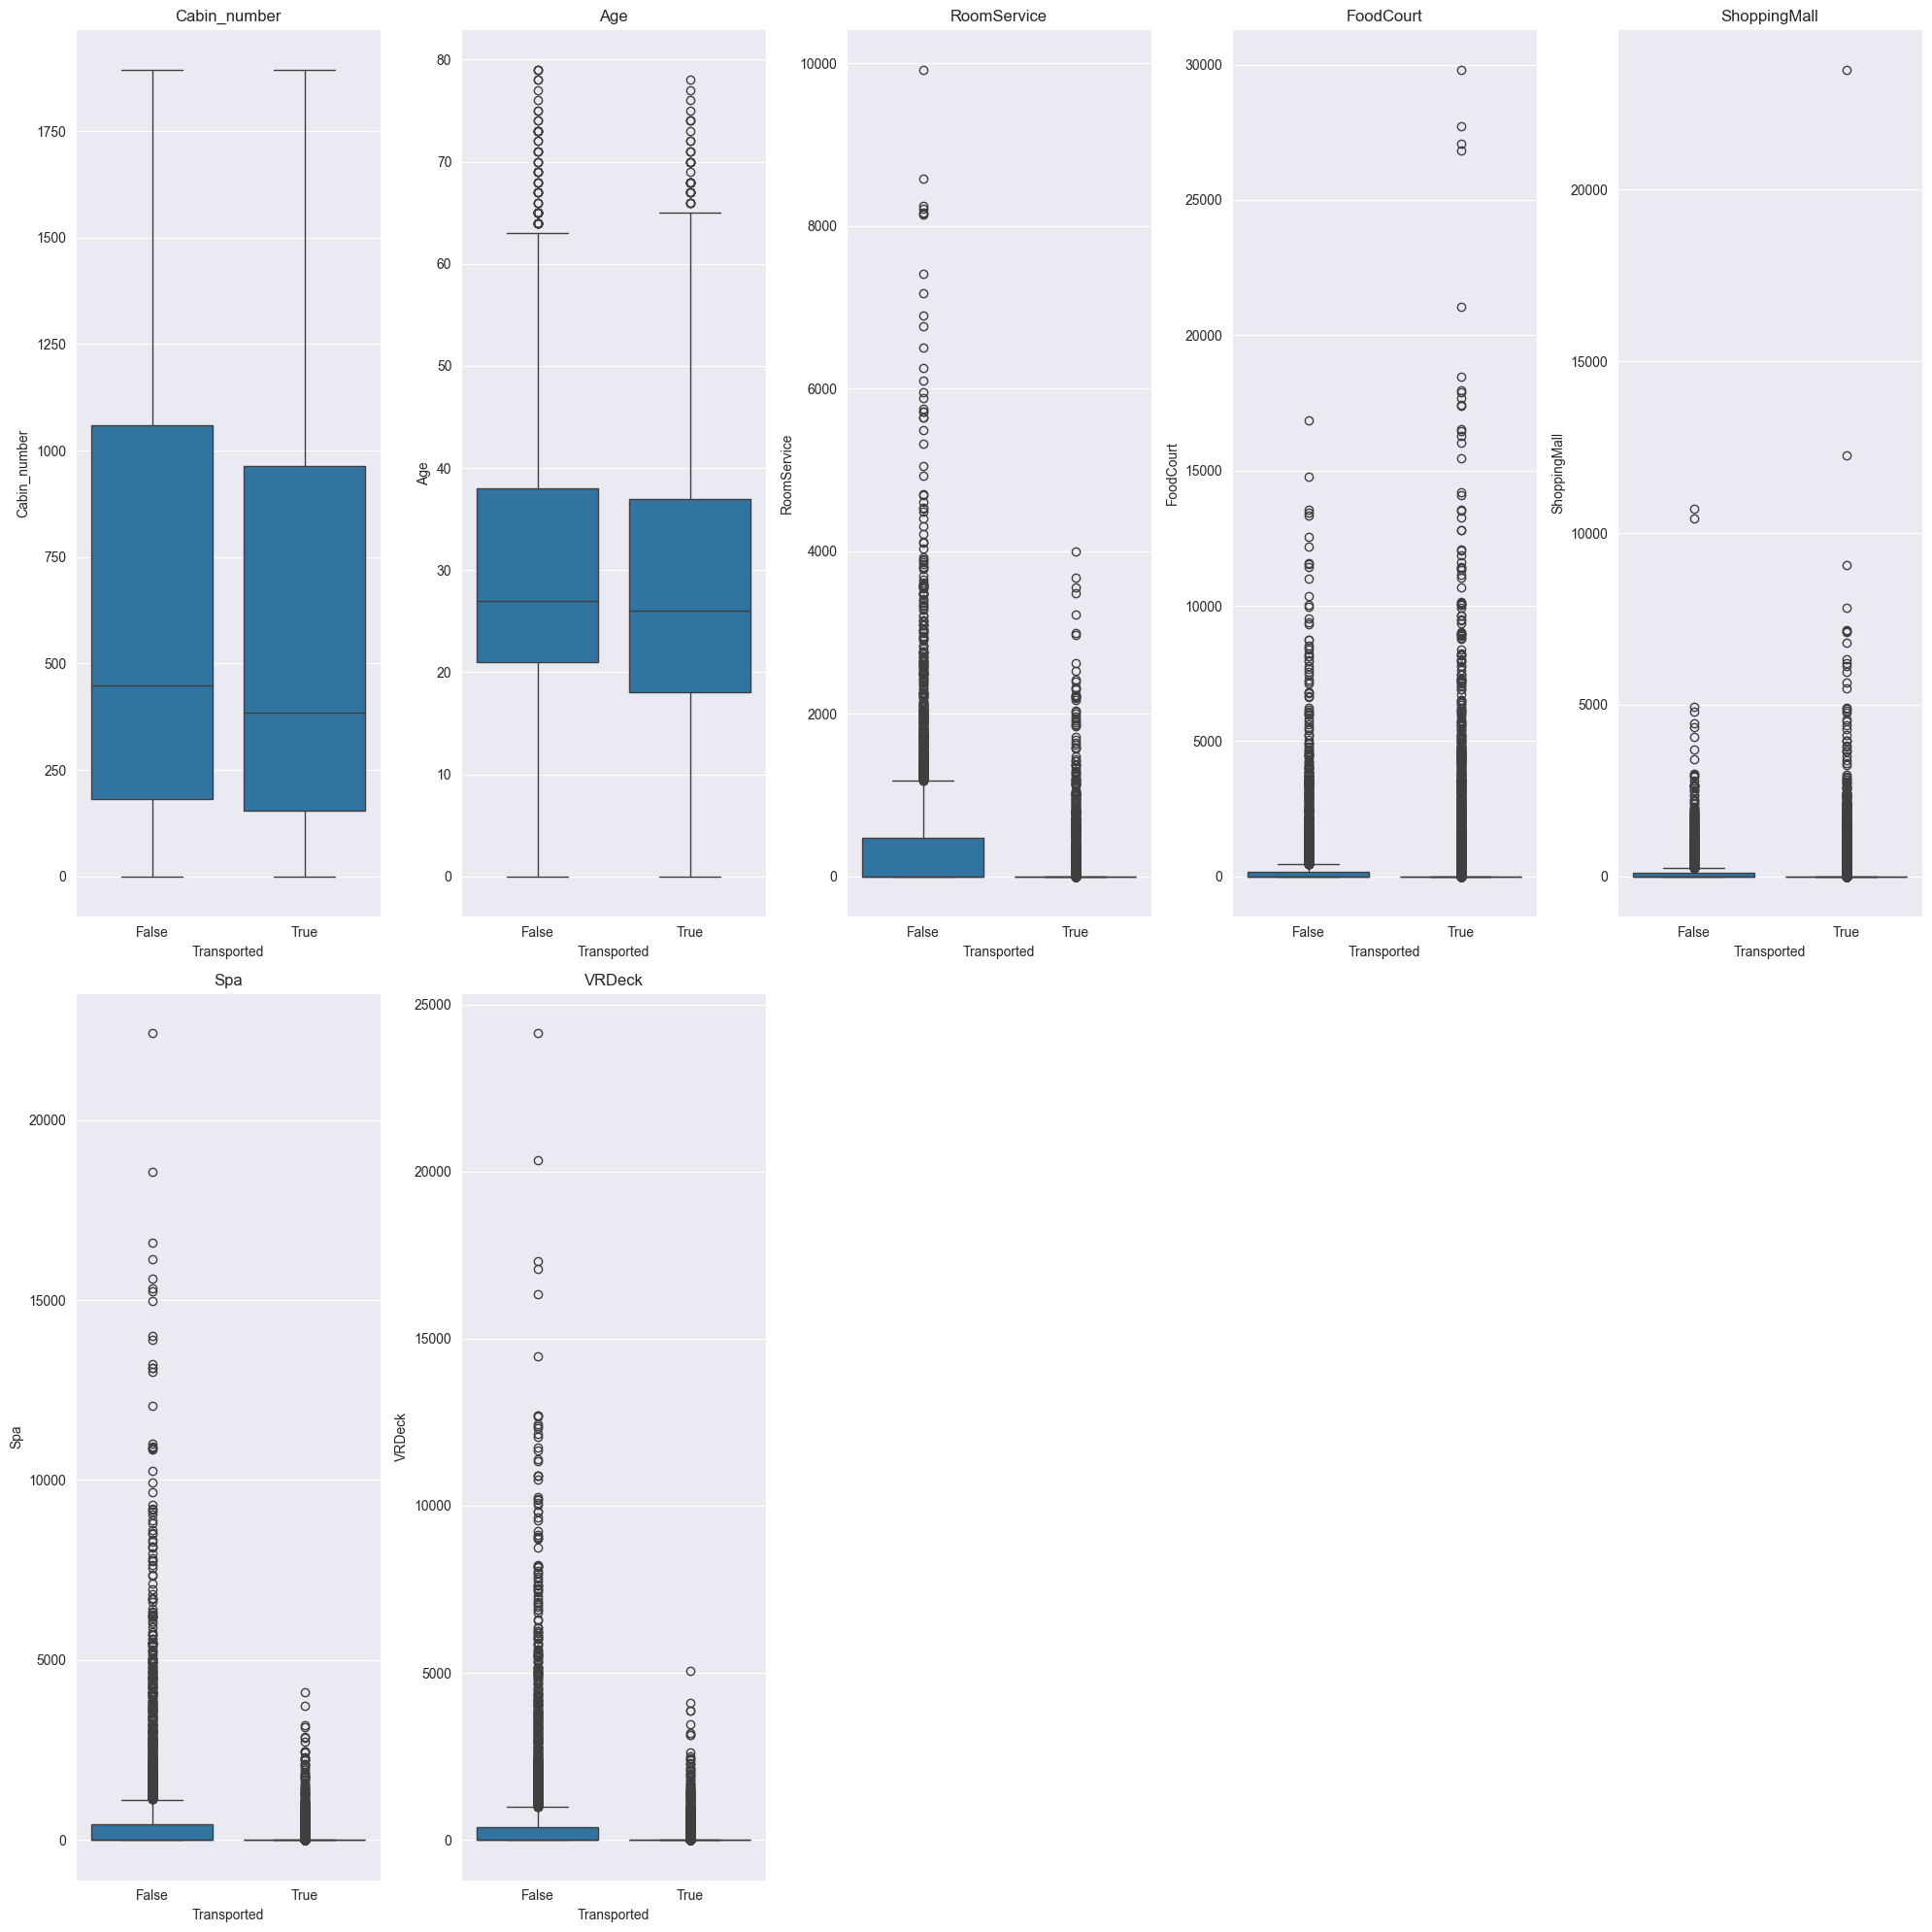

In [20]:
import math
plt.figure(figsize=(20,20))
MAX_WIDTH = 5

for i, column in enumerate(train_num.columns):
    plt.subplot(math.ceil(len(train_num.columns) / MAX_WIDTH), MAX_WIDTH, i + 1)
    sns.boxplot(data=train, x='Transported', y=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

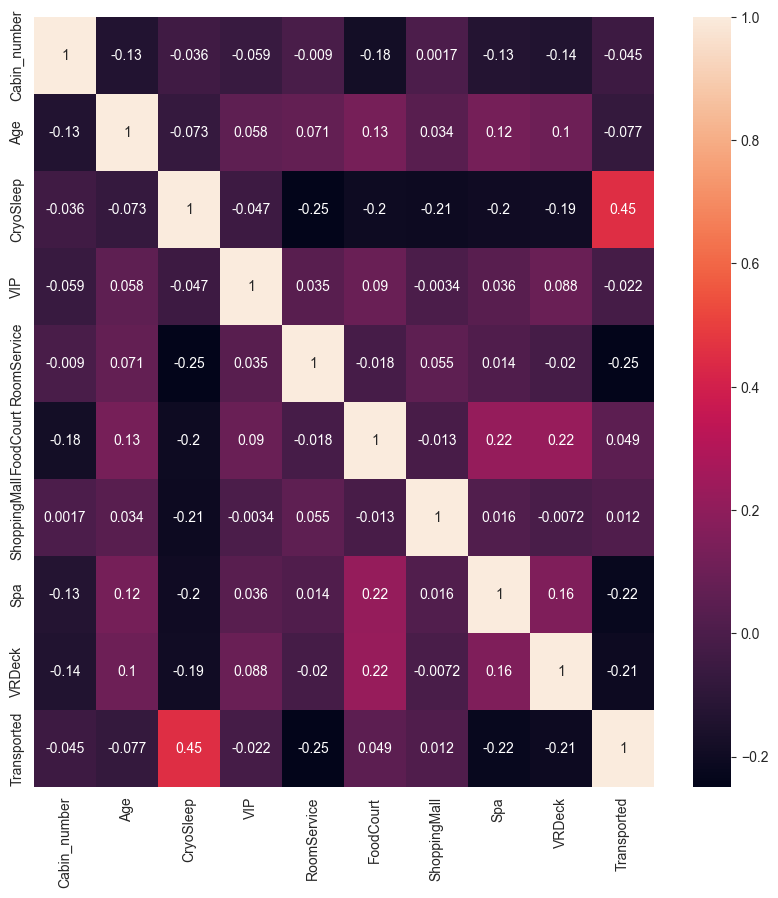

In [21]:
train_tmp = train[['Cabin_number', 'Age','CryoSleep','VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].copy()
train_tmp[['VIP','CryoSleep', 'Transported']] = train_tmp[['VIP','CryoSleep', 'Transported']].astype('int')
plt.figure(figsize = (10,10))
sns.heatmap(train_tmp.corr(),annot = True)
plt.show()

Based on the heatmap, a slight positive correlation can be observed between attributes *CryoSleep* and *Transported*.

## 3. Null handling
To handle null values we are going to test serveral approaches such as:
- deleting null values
- imputation of median, mean or mode

Firstly lets once again analize our dataset.

In [22]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8494
Number of attributes:  17
Number of objects with at least 1 missing value: 1551
Number of missing values in attributes:
  HomePlanet: 195  (2.30%)
  Destination: 178  (2.10%)
  Age: 175  (2.06%)
  RoomService: 177  (2.08%)
  FoodCourt: 178  (2.10%)
  ShoppingMall: 206  (2.43%)
  Spa: 181  (2.13%)
  VRDeck: 184  (2.17%)
  Name: 198  (2.33%)



At first, drop name column as it is not needed

In [23]:
if "Name" in train.columns:    
    train = train.drop(columns=["Name"])
else:
    print("Column was already removed")

### 1. Delete rows that contains any null value

In [24]:
train_after_deletion = train.dropna(how='any')
analize_data(train_after_deletion, "train_after_deletion")
train_after_deletion.set_index('PassengerId', inplace=True)
print(f'Rows lost because of deletion: {len(train) - len(train_after_deletion)}')

Analysis of: train_after_deletion
Number of objects:  7111
Number of attributes:  16
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:

Rows lost because of deletion: 1383


### 2. Use extended imputation

In order to remove missing data we will perform operations as follows:
- HomePlanet: extended imputation of the mode
- CryoSleep: extended imputation, filling nulls with False
- Destination: extended imputation of the mode
- Age: imputation of the mean
- RoomService: extended imputation of the median
- FoodCourt: extended imputation of the median
- Spa: extended imputation of the median
- VRDeck: extended imputation of the median

In addition to this, we will set PassengerId as index of dataframe.

In [25]:
def create_extended_imputation_extra_column(df, col_names):
  for col_name in col_names:
      if col_name in df.columns:
        df.insert(df.columns.get_loc(col_name)+1, (col_name+'_was_missing'),0)
        df[col_name+'_was_missing']= df[col_name+'_was_missing'].astype('bool')
        df[col_name+'_was_missing']= df[col_name].isnull()
      else:
          print("Attribute %s is not present in specified DataFrame!" % col_name)
          return
  return df

In [26]:
def extended_imputation_with_fill_values(df, col_names, fill_values):
    df = create_extended_imputation_extra_column(df, col_names)
    for i, col_name in enumerate(col_names):
        df[col_name].fillna(fill_values[i], inplace=True)
    return df

In [27]:
from sklearn.impute import SimpleImputer
def extended_imputation_with_strategy(df, col_names, strategy_value):
    df = create_extended_imputation_extra_column(df, col_names)
    imp = SimpleImputer(strategy=strategy_value)
    imp.fit(df[col_names])
    df[col_names]= imp.transform(df[col_names])
    return df

In [28]:
def clean_space_data(df):
    clean_data = df.copy()
    clean_data = clean_data.set_index('PassengerId')
    clean_data = extended_imputation_with_fill_values(clean_data, ['CryoSleep'], [False])
    clean_data = extended_imputation_with_strategy(clean_data, ['HomePlanet', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 'most_frequent')
    clean_data = extended_imputation_with_strategy(clean_data, ['Age'], 'mean')
    return clean_data
train_after_imputation = clean_space_data(train)
test_after_imputation = clean_space_data(test)


C:\Users\Bcom_\AppData\Local\Temp\ipykernel_27952\3131540405.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(fill_values[i], inplace=True)
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_27952\3131540405.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [29]:
analize_data(train_after_imputation)
train_after_deletion.head()

Analysis of: data
Number of objects:  8494
Number of attributes:  24
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:



,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B,0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
0002_01,Earth,False,F,0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
0003_01,Europa,False,A,0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
0003_02,Europa,False,A,0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
0004_01,Earth,False,F,1,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


In this way we got rid of missing data and at the same time retained information if particular data was missing.

### 3. Prepare data for testing

In [30]:
from sklearn.preprocessing import LabelEncoder

def transform_cat_to_num(df, category_list):
    label_encoder = LabelEncoder()
    for column in category_list:
        df[column] = label_encoder.fit_transform(df[column])
    return df

Fix data types

In [31]:


boolean_columns = ['HomePlanet_was_missing', 'CryoSleep',
       'CryoSleep_was_missing', 'Destination_was_missing', 'Age_was_missing',
       'VIP', 'RoomService_was_missing',
       'FoodCourt_was_missing', 'ShoppingMall_was_missing', 'Spa_was_missing', 'VRDeck_was_missing', 'Transported']
integer_columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side', 'Destination', 'Age',]
float_columns = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']



categorical_columns_list = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']
train_after_imputation = transform_cat_to_num(train_after_imputation, categorical_columns_list)
train_after_deletion = transform_cat_to_num(train_after_deletion, categorical_columns_list)

#Set correct data types
for df in [train_after_imputation, train_after_deletion]:
    df[[x for x in boolean_columns if x in df.columns]] = df[[x for x in boolean_columns if x in df.columns]].astype('boolean')
    df[[x for x in integer_columns if x in df.columns]] = df[[x for x in integer_columns if x in df.columns]].astype('int16')
    df[[x for x in float_columns if x in df.columns]] = df[[x for x in float_columns if x in df.columns]].astype('float32')

data_for_testing = [train_after_imputation, train_after_deletion]
data_for_testing = {'train_after_imputation' : train_after_imputation, "train_after_deletion" : train_after_deletion}
train_after_deletion.head()
train_after_imputation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HomePlanet                8494 non-null   int64  
 1   HomePlanet_was_missing    8494 non-null   boolean
 2   CryoSleep                 8494 non-null   boolean
 3   CryoSleep_was_missing     8494 non-null   boolean
 4   Cabin_deck                8494 non-null   int16  
 5   Cabin_number              8494 non-null   int16  
 6   Cabin_side                8494 non-null   int16  
 7   Destination               8494 non-null   int16  
 8   Destination_was_missing   8494 non-null   boolean
 9   Age                       8494 non-null   int16  
 10  Age_was_missing           8494 non-null   boolean
 11  VIP                       8494 non-null   boolean
 12  RoomService               8494 non-null   float32
 13  RoomService_was_missing   8494 non-null   boolean
 14  Food

C:\Users\Bcom_\AppData\Local\Temp\ipykernel_27952\75695276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_27952\75695276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_27952\75695276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [32]:
#Fixing data types
train_after_imputation.head()

,HomePlanet,HomePlanet_was_missing,CryoSleep,CryoSleep_was_missing,Cabin_deck,Cabin_number,Cabin_side,Destination,Destination_was_missing,Age,...,FoodCourt,FoodCourt_was_missing,ShoppingMall,ShoppingMall_was_missing,Spa,Spa_was_missing,VRDeck,VRDeck_was_missing,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,1,False,False,False,1,0,0,2,False,39,...,0.0,False,0.0,False,0.0,False,0.0,False,False,0.0
0002_01,0,False,False,False,5,0,1,2,False,24,...,9.0,False,25.0,False,549.0,False,44.0,False,True,736.0
0003_01,1,False,False,False,0,0,1,2,False,58,...,3576.0,False,0.0,False,6715.0,False,49.0,False,False,10383.0
0003_02,1,False,False,False,0,0,1,2,False,33,...,1283.0,False,371.0,False,3329.0,False,193.0,False,False,5176.0
0004_01,0,False,False,False,5,1,1,2,False,16,...,70.0,False,151.0,False,565.0,False,2.0,False,True,1091.0


Our data is ready to go, now we need to specify our models

## Machine learning models

### LogisticRegression

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 27
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 400
n_resources: 27
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 1
n_candidates: 134
n_resources: 81
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 2
n_candidates: 45
n_resources: 243
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 729
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 2187
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 2
n_resources: 6561
Fitting 5 folds for each of 2 candidates, totalling 10 fits
train_after_imputation - Found best parameters: {'C': 100, 'class_weight': 'balanced', 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state'

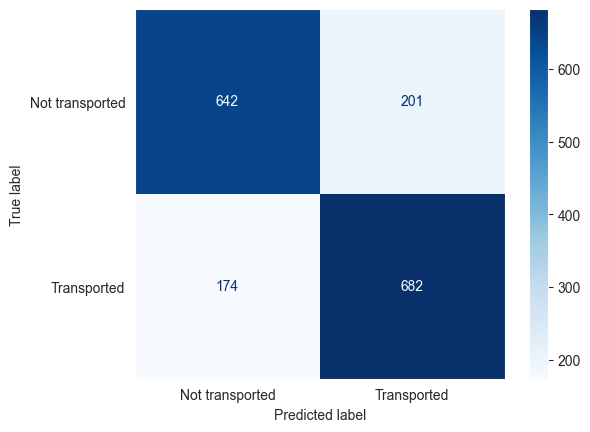

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 23
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 400
n_resources: 23
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
----------
iter: 1
n_candidates: 134
n_resources: 69
Fitting 5 folds for each of 134 candidates, totalling 670 fits
----------
iter: 2
n_candidates: 45
n_resources: 207
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 3
n_candidates: 15
n_resources: 621
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 4
n_candidates: 5
n_resources: 1863
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 5
n_candidates: 2
n_resources: 5589
Fitting 5 folds for each of 2 candidates, totalling 10 fits
train_after_deletion - Found best parameters: {'C': 1, 'class_weight': None, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'solver': 'li

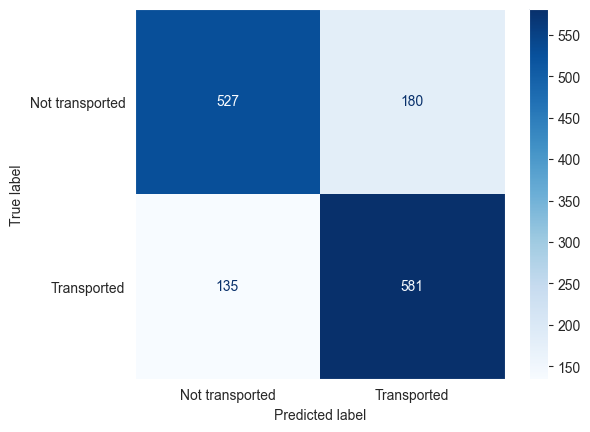

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import itertools
import warnings



penalty_list = ['l2','l1','elasticnet',None]
C_list = [0.01,0.1,1,10,100]
solver_list = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
max_iter_list = [1000]
multi_class_list = ['ovr','multinomial']
class_weight_list = ['balanced', None]

parametr_dictionary = {
    'penalty': penalty_list,
    'C': C_list,
    'solver': solver_list,
    'max_iter': max_iter_list,
    'multi_class': multi_class_list,
    'class_weight': class_weight_list,
    'random_state' : [0]
}

# warnings.filterwarnings("ignore")
# for name, dataframe in data_for_testing.items():
#     optimal_params = HalvingGridSearchCV(estimator = LogisticRegression(), param_grid=parametr_dictionary, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5)
#     X  = dataframe.drop('Transported', axis=1)
#     y = dataframe['Transported']
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
#     optimal_params.fit(X_train, y_train)
#     print(f"{name} - Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")
#     disp = ConfusionMatrixDisplay.from_estimator(optimal_params.best_estimator_, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
#     plt.grid(False)
#     plt.show()
   


### DecisionTreeClassifier

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 27
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 576
n_resources: 27
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
----------
iter: 1
n_candidates: 192
n_resources: 81
Fitting 5 folds for each of 192 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 64
n_resources: 243
Fitting 5 folds for each of 64 candidates, totalling 320 fits
----------
iter: 3
n_candidates: 22
n_resources: 729
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 4
n_candidates: 8
n_resources: 2187
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 6561
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_imputation - Found best parameters: {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'random_

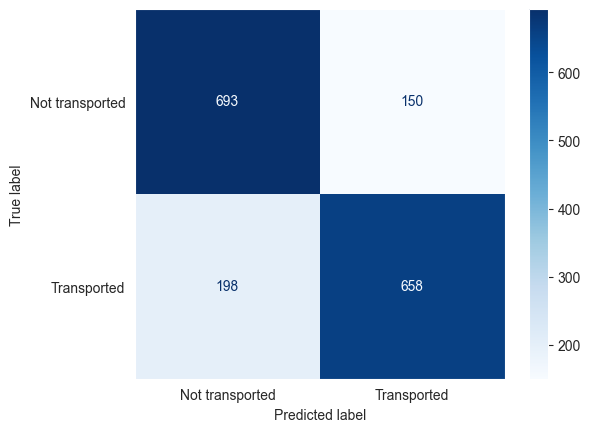

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 23
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 576
n_resources: 23
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
----------
iter: 1
n_candidates: 192
n_resources: 69
Fitting 5 folds for each of 192 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 64
n_resources: 207
Fitting 5 folds for each of 64 candidates, totalling 320 fits
----------
iter: 3
n_candidates: 22
n_resources: 621
Fitting 5 folds for each of 22 candidates, totalling 110 fits
----------
iter: 4
n_candidates: 8
n_resources: 1863
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 5589
Fitting 5 folds for each of 3 candidates, totalling 15 fits
train_after_deletion - Found best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'rando

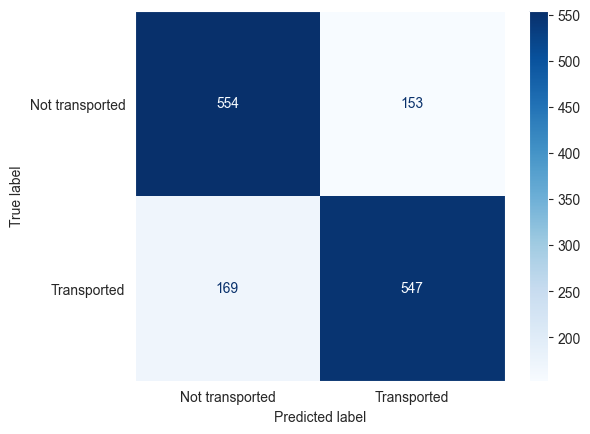

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
parametr_dictionary = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [50, 100, None],
    'min_samples_split': [20, 5, 2, 1],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [5, 2, None],
    'random_state': [0]
}

# warnings.filterwarnings("ignore")
# for name, dataframe in data_for_testing.items():
#     optimal_params = HalvingGridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametr_dictionary, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, random_state=0)
#     X  = dataframe.drop('Transported', axis=1)
#     y = dataframe['Transported']
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
#     optimal_params.fit(X_train, y_train)
#     print(f"{name} - Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")
#     disp = ConfusionMatrixDisplay.from_estimator(optimal_params.best_estimator_, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
#     plt.grid(False)
#     plt.show()



## XGBoost
#### Using data after imputation without any missing data

In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
# # TEST 1
# params = {
#     'n_estimators': [20,50,100],
#     'max_depth': [3,7,12],
#     'min_child_weight': [1,3,5,10],
#     'learning_rate': [0.01,0.05,0.1],
#     'gamma': [0,0.5,1],
#     'reg_alpha': [0,0.5,1],
#     'reg_lambda': [0.1,1,10],
#     'scale_pos_weight': [1,2,5]
# }
# OUTPUT: Found best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0.1, 'scale_pos_weight': 5} (0.8955)

# # # TEST 2
# params = {
#     'n_estimators': [100,150,200],
#     'max_depth': [5,7],
#     'min_child_weight': [3], #Optimal
#     'learning_rate': [0.1, 0.15],
#     'gamma': [0],
#     'reg_alpha': [1,2,5],
#     'reg_lambda': [0.01, 0.05, 0.1],
#     'scale_pos_weight': [5,7,10]
# }
# # OUTPUT: Found best parameters: {'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'reg_alpha': 2, 'reg_lambda': 0.1, 'scale_pos_weight': 5} (0.8996)

# # TEST 3
# params = {
#     'n_estimators': [125,150,175],
#     'max_depth': [4,5,6],
#     'min_child_weight': [3], #Optimal
#     'learning_rate': [0.15, 0.2, 0.25],
#     'gamma': [0, 0.15, 0.25],
#     'reg_alpha': [2,3,4],
#     'reg_lambda': [0.1, 0.25, 0.5],
#     'scale_pos_weight': [5] #Optimal
# }
# # OUTPUT: Found best parameters: {'gamma': 0.25, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 150, 'reg_alpha': 2, 'reg_lambda': 0.5, 'scale_pos_weight': 5} (0.8931)


# optimal_params = HalvingGridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10), param_grid=params, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5)
#
# X  = train_after_imputation.drop('Transported', axis=1)
# y = train_after_imputation['Transported']
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
#
# optimal_params.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)
# print(f"Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")

Based on tests optimal parameters are: {'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'reg_alpha': 2, 'reg_lambda': 0.1, 'scale_pos_weight': 5} with score 0.8996

Next we will apply these parameters to model operating on full data.

[0]	validation_0-aucpr:0.85728
[1]	validation_0-aucpr:0.86189
[2]	validation_0-aucpr:0.86672
[3]	validation_0-aucpr:0.86505
[4]	validation_0-aucpr:0.87537
[5]	validation_0-aucpr:0.88249
[6]	validation_0-aucpr:0.88198
[7]	validation_0-aucpr:0.88252
[8]	validation_0-aucpr:0.88337
[9]	validation_0-aucpr:0.88619
[10]	validation_0-aucpr:0.88756
[11]	validation_0-aucpr:0.88884
[12]	validation_0-aucpr:0.88896
[13]	validation_0-aucpr:0.88972
[14]	validation_0-aucpr:0.88985
[15]	validation_0-aucpr:0.89024
[16]	validation_0-aucpr:0.89297
[17]	validation_0-aucpr:0.89343
[18]	validation_0-aucpr:0.89372
[19]	validation_0-aucpr:0.89522
[20]	validation_0-aucpr:0.89526
[21]	validation_0-aucpr:0.89584
[22]	validation_0-aucpr:0.89599
[23]	validation_0-aucpr:0.89754
[24]	validation_0-aucpr:0.89779
[25]	validation_0-aucpr:0.89814
[26]	validation_0-aucpr:0.89778
[27]	validation_0-aucpr:0.89889
[28]	validation_0-aucpr:0.89881
[29]	validation_0-aucpr:0.89883
[30]	validation_0-aucpr:0.89906
[31]	validation_0-

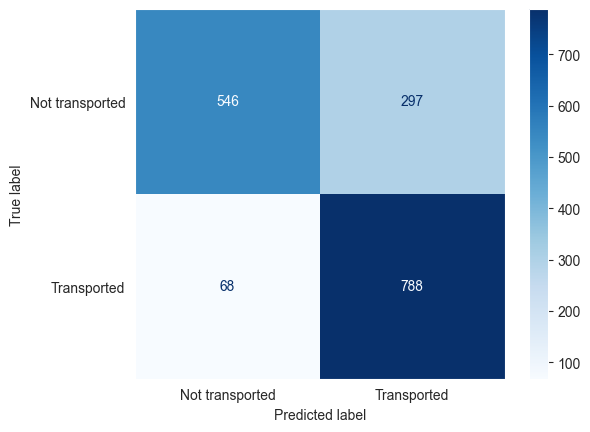

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay


X = train_after_imputation.drop('Transported', axis=1)
y = train_after_imputation['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    gamma=0,
    learning_rate=0.15,
    max_depth=5,
    min_child_weight=3,
    n_estimators=150,
    reg_alpha=2,
    reg_lambda=0.1,
    scale_pos_weight=5,
    eval_metric= 'aucpr'
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_imputed = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.grid(False)
plt.show()

#### Using data after deletion of objects with missing values

In [392]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
# # TEST 1
# params = {
#     'n_estimators': [20,50,100],
#     'max_depth': [3,7,12],
#     'min_child_weight': [1,3,5,10],
#     'learning_rate': [0.01,0.05,0.1],
#     'gamma': [0,0.5,1],
#     'reg_alpha': [0,0.5,1],
#     'reg_lambda': [0.1,1,10],
#     'scale_pos_weight': [1,2,5]
# }
# # OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 2} (0.9014)

# # TEST 2
# params = {
#     'n_estimators': [100,150,200],
#     'max_depth': [5,6,7],
#     'min_child_weight': [3],
#     'learning_rate': [0.1,0.15,0.25],
#     'gamma': [1,2,3],
#     'reg_alpha': [0.3,0.5,0.7],
#     'reg_lambda': [0.01,0.05,0.1],
#     'scale_pos_weight': [2]
# }
# # OUTPUT: Found best parameters: {'gamma': 3, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 200, 'reg_alpha': 0.3, 'reg_lambda': 0.01, 'scale_pos_weight': 2} (0.8936)


# optimal_params = HalvingGridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10), param_grid=params, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5)
#
# X  = train_after_deletion.drop('Transported', axis=1)
# y = train_after_deletion['Transported']
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
#
# optimal_params.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)
# print(f"Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")

Based on tests optimal parameters are: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 2} with score 0.9014

Accordingly, we will test model on full data.

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay


X = train_after_deletion.drop('Transported', axis=1)
y = train_after_deletion['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    eval_metric= 'aucpr',
    gamma=1,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=3,
    n_estimators=100,
    reg_alpha=0.5,
    reg_lambda=0.1,
    scale_pos_weight=2
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_deleted = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.grid(False)
plt.show()

NameError: name 'xgb' is not defined

#### Using One-hot encoding

Preparing data for XGBoost. Performing One-hot encoding.

In [394]:
df = train.copy()
df.set_index('PassengerId', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Cabin_deck    8494 non-null   object 
 3   Cabin_number  8494 non-null   int64  
 4   Cabin_side    8494 non-null   object 
 5   Destination   8316 non-null   object 
 6   Age           8319 non-null   float64
 7   VIP           8494 non-null   bool   
 8   RoomService   8317 non-null   float64
 9   FoodCourt     8316 non-null   float64
 10  ShoppingMall  8288 non-null   float64
 11  Spa           8313 non-null   float64
 12  VRDeck        8310 non-null   float64
 13  Transported   8494 non-null   bool   
 14  Expenses      8494 non-null   float64
dtypes: bool(3), float64(7), int64(1), object(4)
memory usage: 887.6+ KB


In [395]:
analize_data(df, "original data")
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
float_columns = ['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck', 'Expenses','Cabin_number','Age']
category_columns = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']
df.replace(' ', '_', regex=True, inplace=True)
#Set correct data types
df[boolean_columns] = df[boolean_columns].astype('boolean')
df[float_columns] = df[float_columns].astype('float32')

df.info()
df.head()

Analysis of: original data
Number of objects:  8494
Number of attributes:  15
Number of objects with at least 1 missing value: 1383
Number of missing values in attributes:
  HomePlanet: 195  (2.30%)
  Destination: 178  (2.10%)
  Age: 175  (2.06%)
  RoomService: 177  (2.08%)
  FoodCourt: 178  (2.10%)
  ShoppingMall: 206  (2.43%)
  Spa: 181  (2.13%)
  VRDeck: 184  (2.17%)

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8299 non-null   object 
 1   CryoSleep     8494 non-null   boolean
 2   Cabin_deck    8494 non-null   object 
 3   Cabin_number  8494 non-null   float32
 4   Cabin_side    8494 non-null   object 
 5   Destination   8316 non-null   object 
 6   Age           8319 non-null   float32
 7   VIP           8494 non-null   boolean
 8   RoomService   8317 non-null   float32
 9   FoodCourt     8316 non-null   float32

,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B,0.0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
0002_01,Earth,False,F,0.0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
0003_01,Europa,False,A,0.0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
0003_02,Europa,False,A,0.0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
0004_01,Earth,False,F,1.0,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


In [396]:
df_encoded = pd.get_dummies(df, columns=category_columns)
df_encoded.head()

,CryoSleep,Cabin_number,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_Port,Cabin_side_Starboard,Destination_55_Cancri_e,Destination_PSO_J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,False,False,True,False,False,False,True
0002_01,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,False,False,True,False,False,False,True,False,False,True
0003_01,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,False,False,False,True,False,False,True
0003_02,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,False,False,False,True,False,False,True
0004_01,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,False,False,True,False,False,False,True,False,False,True


Finding optimal parameters

In [397]:
# # TEST 1
# params = {
#     'n_estimators': [20,50,100],
#     'max_depth': [3,7,12],
#     'min_child_weight': [1,3,5,10],
#     'learning_rate': [0.01,0.05,0.1],
#     'gamma': [0,0.5,1],
#     'reg_alpha': [0,0.5,1],
#     'reg_lambda': [0.1,1,10],
#     'scale_pos_weight': [1,2,5]
# }
# # OUTPUT: Found best parameters: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 1} (0.9004)
# # TEST 2
# params = {
#     'n_estimators': [100,150,200],
#     'max_depth': [5,6,7],
#     'min_child_weight': [1,2],
#     'learning_rate': [0.01,0.25,0.05],
#     'gamma': [1,1.5,2],
#     'reg_alpha': [0.25,0.5],
#     'reg_lambda': [0.01,0.05,0.1],
#     'scale_pos_weight': [0.5, 1]
# }
# # OUTPUT: Found best parameters: {'gamma': 2, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'reg_alpha': 0.25, 'reg_lambda': 0.1, 'scale_pos_weight': 1} (0.8991)
# 
# optimal_params = HalvingGridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic', seed=0, subsample=0.9, colsample_bytree= 0.5, eval_metric='auc', early_stopping_rounds= 10, missing=np.nan), param_grid=params, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5)
# 
# X  = df_encoded.drop('Transported', axis=1)
# y = df_encoded['Transported']
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
# 
# optimal_params.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)
# print(f"Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")

Optimal parameters found via test: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'scale_pos_weight': 1} with score 0.9004

Model using full data

[0]	validation_0-aucpr:0.87858
[1]	validation_0-aucpr:0.88246
[2]	validation_0-aucpr:0.88427
[3]	validation_0-aucpr:0.88581
[4]	validation_0-aucpr:0.88658
[5]	validation_0-aucpr:0.88786
[6]	validation_0-aucpr:0.88864
[7]	validation_0-aucpr:0.88972
[8]	validation_0-aucpr:0.89064
[9]	validation_0-aucpr:0.89177
[10]	validation_0-aucpr:0.89204
[11]	validation_0-aucpr:0.89213
[12]	validation_0-aucpr:0.89400
[13]	validation_0-aucpr:0.89258
[14]	validation_0-aucpr:0.89282
[15]	validation_0-aucpr:0.89332
[16]	validation_0-aucpr:0.89380
[17]	validation_0-aucpr:0.89363
[18]	validation_0-aucpr:0.89464
[19]	validation_0-aucpr:0.89501
[20]	validation_0-aucpr:0.89505
[21]	validation_0-aucpr:0.89507
[22]	validation_0-aucpr:0.89540
[23]	validation_0-aucpr:0.89549
[24]	validation_0-aucpr:0.89588
[25]	validation_0-aucpr:0.89604
[26]	validation_0-aucpr:0.89589
[27]	validation_0-aucpr:0.89885
[28]	validation_0-aucpr:0.89867
[29]	validation_0-aucpr:0.89968
[30]	validation_0-aucpr:0.89992
[31]	validation_0-

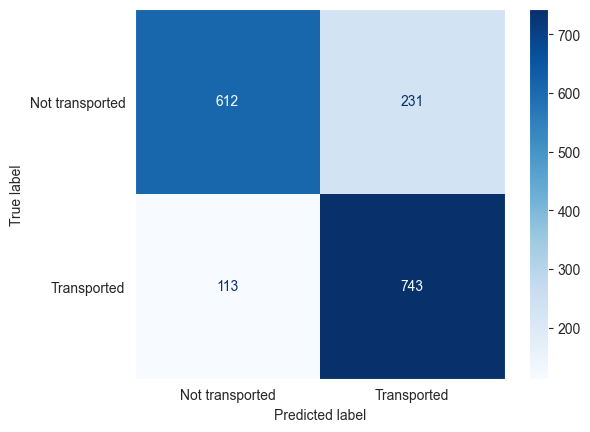

In [398]:
X = df_encoded.drop('Transported', axis=1)
y = df_encoded['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

model = xgb.XGBClassifier(
    seed=0,
    objective='binary:logistic',
    eval_metric= 'aucpr',
    gamma=1,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=3,
    n_estimators=100,
    reg_alpha=0.5,
    reg_lambda=0.1,
    scale_pos_weight=2
)

model.fit(X_train, y_train, verbose=1, eval_set=[(X_valid, y_valid)])

disp_ohe = ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
plt.grid(False)
plt.show()

#### Comparison of each of approaches

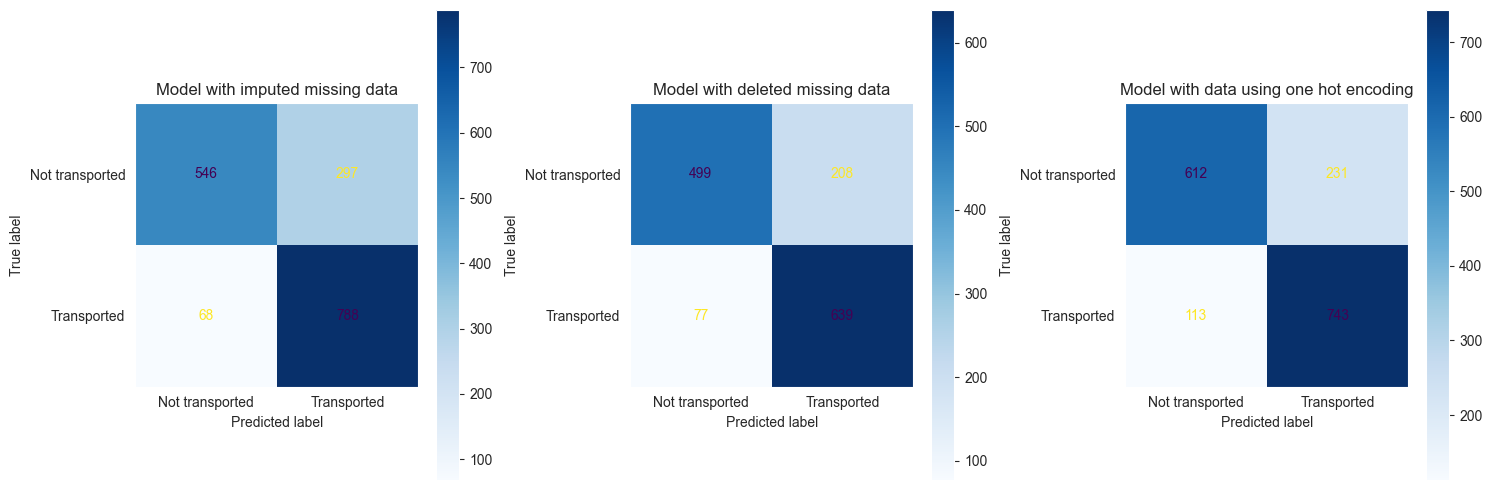

In [415]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
disp_imputed.plot(ax=axes[0])
disp_deleted.plot(ax=axes[1])
disp_ohe.plot(ax=axes[2])
axes[0].set_title("Model with imputed missing data")
axes[1].set_title("Model with deleted missing data")
axes[2].set_title("Model with data using one hot encoding")
for ax in axes:
    im = ax.get_images()[0]
    im.set_cmap('Blues')
    ax.grid(False)
plt.tight_layout()
plt.show()

## MLPClassifier

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 251
max_resources_: 6795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 251
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 1
n_candidates: 11
n_resources: 753
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 4
n_resources: 2259
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 6777
Fitting 5 folds for each of 2 candidates, totalling 10 fits
train_after_imputation - Found best parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'momentum': 0.9, 'random_state': 0, 'solver': 'sgd'} (0.7622)


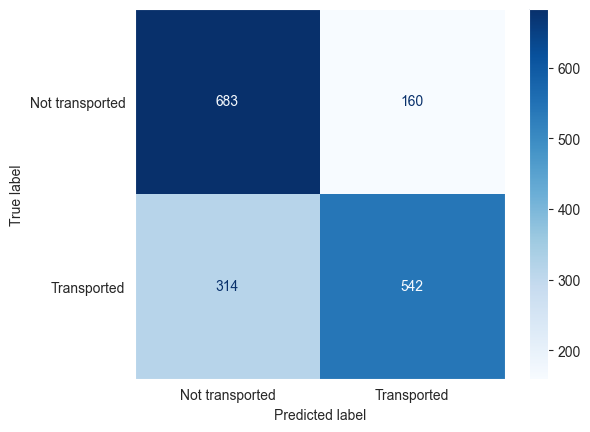

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 210
max_resources_: 5688
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 32
n_resources: 210
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 1
n_candidates: 11
n_resources: 630
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 4
n_resources: 1890
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 5670
Fitting 5 folds for each of 2 candidates, totalling 10 fits
train_after_deletion - Found best parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'momentum': 0.9, 'random_state': 0, 'solver': 'sgd'} (0.7343)


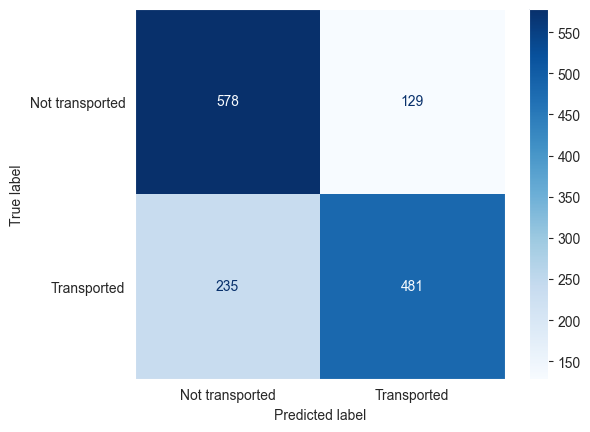

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

hidden_layer_sizes_list = [(10,), (20,)]
activation_list = ['relu', 'tanh']
solver_list = ['adam', 'sgd']
alpha_list = [0.0001, 0.01]
learning_rate_list = ['constant', 'adaptive']
max_iter_list = [500]
batch_size_list = ['auto']
learning_rate_init_list = [0.001]
momentum_list = [0.9]
early_stopping_list = [True]

parametr_dictionary = {
    'hidden_layer_sizes': hidden_layer_sizes_list,
    'activation': activation_list,
    'solver': solver_list,
    'alpha': alpha_list,
    'max_iter': max_iter_list,
    'batch_size': batch_size_list,
    'learning_rate': learning_rate_list,
    'learning_rate_init': learning_rate_init_list,
    'momentum': momentum_list,
    'early_stopping': early_stopping_list,
    'random_state': [0]
}

# warnings.filterwarnings("ignore")
# for name, dataframe in data_for_testing.items():
#     optimal_params = HalvingGridSearchCV(estimator = MLPClassifier(), param_grid=parametr_dictionary, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, random_state=0)
#     X  = dataframe.drop('Transported', axis=1)
#     y = dataframe['Transported']
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0, stratify=y)
#     optimal_params.fit(X_train, y_train)
#     print(f"{name} - Found best parameters: {optimal_params.best_params_} ({optimal_params.best_score_:.4f})")
#     disp = ConfusionMatrixDisplay.from_estimator(optimal_params.best_estimator_, X_valid, y_valid, cmap='Blues', display_labels=["Not transported", "Transported"])
#     plt.grid(False)
#     plt.show()




## Data testing
In this step we will evaluate model on our data and check which null handling method preforms better


In [401]:
from sklearn.model_selection import train_test_split
for df in data_for_testing:
       X  = df.iloc[:,:-1].copy()
       y = df.iloc[:,-1].copy()
       y= y.astype('int')
       X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=42, stratify=y)

AttributeError: 'str' object has no attribute 'iloc'